In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
merged_data=pd.read_csv('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/merged_data.csv',sep=';')
merged_data.head()

,state_po,county,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,unemp rate,"Poverty Percent, All Ages",Real GDP
0,SC,abbeville,4101,23,88,6,8215,"6,5","15,3",572455
1,VA,accomack,7578,0,188,24,9172,"6,7","17,6",1785338
2,ID,ada,120539,0,5310,2841,130699,"5,5","7,7",29310868
3,OK,adair,1387,0,62,74,5585,6,"22,3",395223
4,MO,adair,3710,43,157,13,6413,"5,1","17,9",785869


In [123]:
merged_data['unemp rate'] = merged_data['unemp rate'].replace({',': '.'}, regex=True)
merged_data['Poverty Percent, All Ages'] = merged_data['Poverty Percent, All Ages'].replace({',': '.'}, regex=True)


# Convertiamo le colonne in numeri float
merged_data['unemp rate'] = pd.to_numeric(merged_data['unemp rate'], errors='coerce')
merged_data['Poverty Percent, All Ages'] = pd.to_numeric(merged_data['Poverty Percent, All Ages'], errors='coerce')
merged_data['Real GDP'] = pd.to_numeric(merged_data['Real GDP'], errors='coerce')

In [124]:
specific_value_row = merged_data[merged_data['Real GDP'] == '572,455.00']
print(specific_value_row)

Empty DataFrame
Columns: [state_po, county, DEMOCRAT, GREEN, LIBERTARIAN, OTHER, REPUBLICAN, unemp rate, Poverty Percent, All Ages, Real GDP]
Index: []


In [125]:
merged_data.isnull().sum()

,0
state_po,0
county,0
DEMOCRAT,0
GREEN,0
LIBERTARIAN,0
OTHER,0
REPUBLICAN,0
unemp rate,0
"Poverty Percent, All Ages",0
Real GDP,0


In [126]:
# Assuming merged_data is your DataFrame
correlation = merged_data['DEMOCRAT'].corr(merged_data['REPUBLICAN'])
print(f"Correlation between Democrat and Republican votes: {correlation}")


Correlation between Democrat and Republican votes: 0.8835535266181695


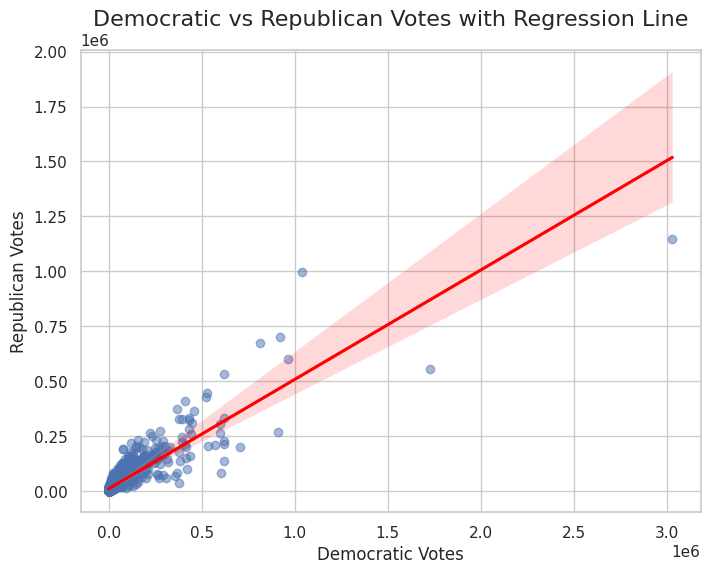

In [127]:
# Regression plot with a line
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_data, x='DEMOCRAT', y='REPUBLICAN', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Title and labels
plt.title("Democratic vs Republican Votes with Regression Line", fontsize=16)
plt.xlabel("Democratic Votes", fontsize=12)
plt.ylabel("Republican Votes", fontsize=12)

# Show the plot
plt.show()


In [128]:
# this is obviuous because for bigger counties, as democrats votes tend to increase, so does the democrats. So it's better to use %

# Calculate vote percentages for each party
merged_data['Democrat Percent'] = (merged_data['DEMOCRAT'] / (merged_data['DEMOCRAT'] + merged_data['REPUBLICAN'] + merged_data['GREEN'] + merged_data['LIBERTARIAN'] + merged_data['OTHER'])) * 100
merged_data['Republican Percent'] = (merged_data['REPUBLICAN'] / (merged_data['DEMOCRAT'] + merged_data['REPUBLICAN'] + merged_data['GREEN'] + merged_data['LIBERTARIAN'] + merged_data['OTHER'])) * 100
merged_data['Green Percent'] = (merged_data['GREEN'] / (merged_data['DEMOCRAT'] + merged_data['REPUBLICAN'] + merged_data['GREEN'] + merged_data['LIBERTARIAN'] + merged_data['OTHER'])) * 100
merged_data['Libertarian Percent'] = (merged_data['LIBERTARIAN'] / (merged_data['DEMOCRAT'] + merged_data['REPUBLICAN'] + merged_data['GREEN'] + merged_data['LIBERTARIAN'] + merged_data['OTHER'])) * 100
merged_data['Other Percent'] = (merged_data['OTHER'] / (merged_data['DEMOCRAT'] + merged_data['REPUBLICAN'] + merged_data['GREEN'] + merged_data['LIBERTARIAN'] + merged_data['OTHER'])) * 100

merged_data.head()

,state_po,county,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,unemp rate,"Poverty Percent, All Ages",Real GDP,Democrat Percent,Republican Percent,Green Percent,Libertarian Percent,Other Percent
0,SC,abbeville,4101,23,88,6,8215,6.50,15.30,572455,32.98,66.07,0.18,0.71,0.05
1,VA,accomack,7578,0,188,24,9172,6.70,17.60,1785338,44.68,54.07,0.00,1.11,0.14
2,ID,ada,120539,0,5310,2841,130699,5.50,7.70,29310868,46.47,50.39,0.00,2.05,1.10
3,OK,adair,1387,0,62,74,5585,6.00,22.30,395223,19.51,78.57,0.00,0.87,1.04
4,MO,adair,3710,43,157,13,6413,5.10,17.90,785869,35.89,62.05,0.42,1.52,0.13


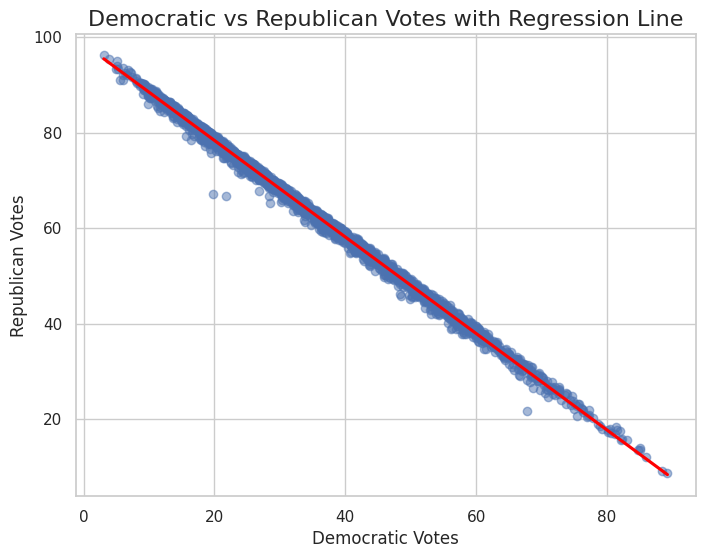

In [129]:
#Regression plot with a line
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_data, x='Democrat Percent', y='Republican Percent', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Title and labels
plt.title("Democratic vs Republican Votes with Regression Line", fontsize=16)
plt.xlabel("Democratic Votes", fontsize=12)
plt.ylabel("Republican Votes", fontsize=12)

# Show the plot
plt.show()

                           Democrat Percent  Republican Percent  \
Democrat Percent                       1.00               -1.00   
Republican Percent                    -1.00                1.00   
Green Percent                          0.38               -0.40   
Libertarian Percent                   -0.01               -0.03   
Other Percent                          0.14               -0.17   
unemp rate                             0.40               -0.39   
Poverty Percent, All Ages              0.05               -0.04   
Real GDP                               0.33               -0.33   

                           Green Percent  Libertarian Percent  Other Percent  \
Democrat Percent                    0.38                -0.01           0.14   
Republican Percent                 -0.40                -0.03          -0.17   
Green Percent                       1.00                -0.00           0.16   
Libertarian Percent                -0.00                 1.00          -0.18

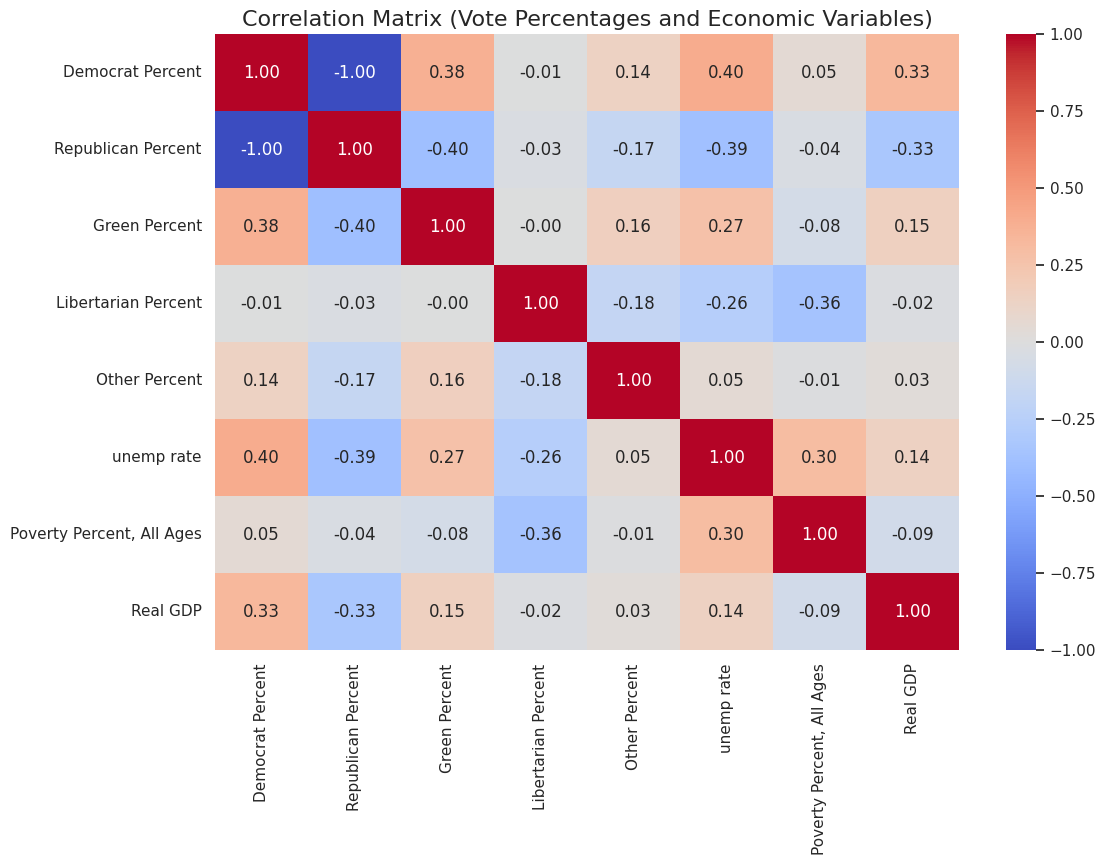

In [130]:

# Step 1: Select only the columns related to percentages and economic variables
columns_of_interest = ['Democrat Percent', 'Republican Percent',
                       'Green Percent', 'Libertarian Percent', 'Other Percent',
                       'unemp rate', 'Poverty Percent, All Ages', 'Real GDP']

# Filter the dataset to include only these columns
filtered_data = merged_data[columns_of_interest]

# Step 2: Calculate the correlation matrix for these selected columns
correlation_matrix = filtered_data.corr()

# Step 3: Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Vote Percentages and Economic Variables)", fontsize=16)
plt.show()


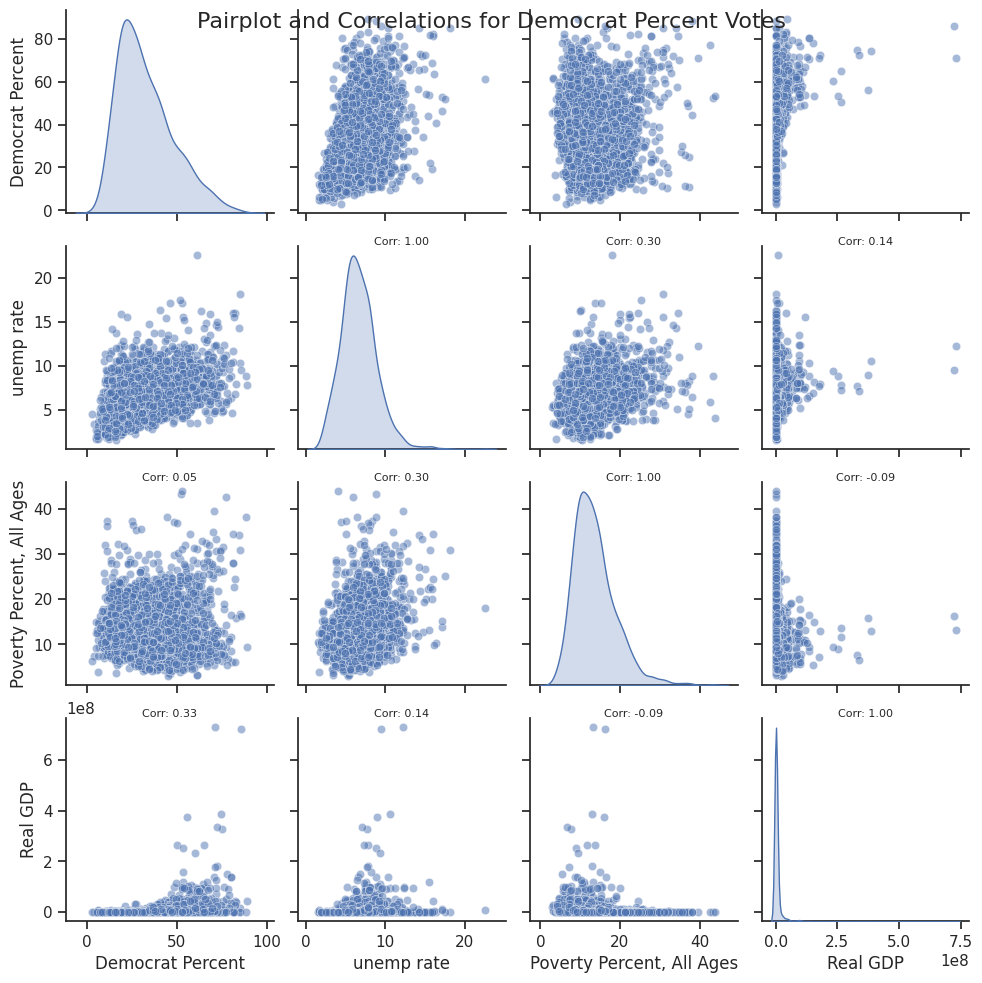

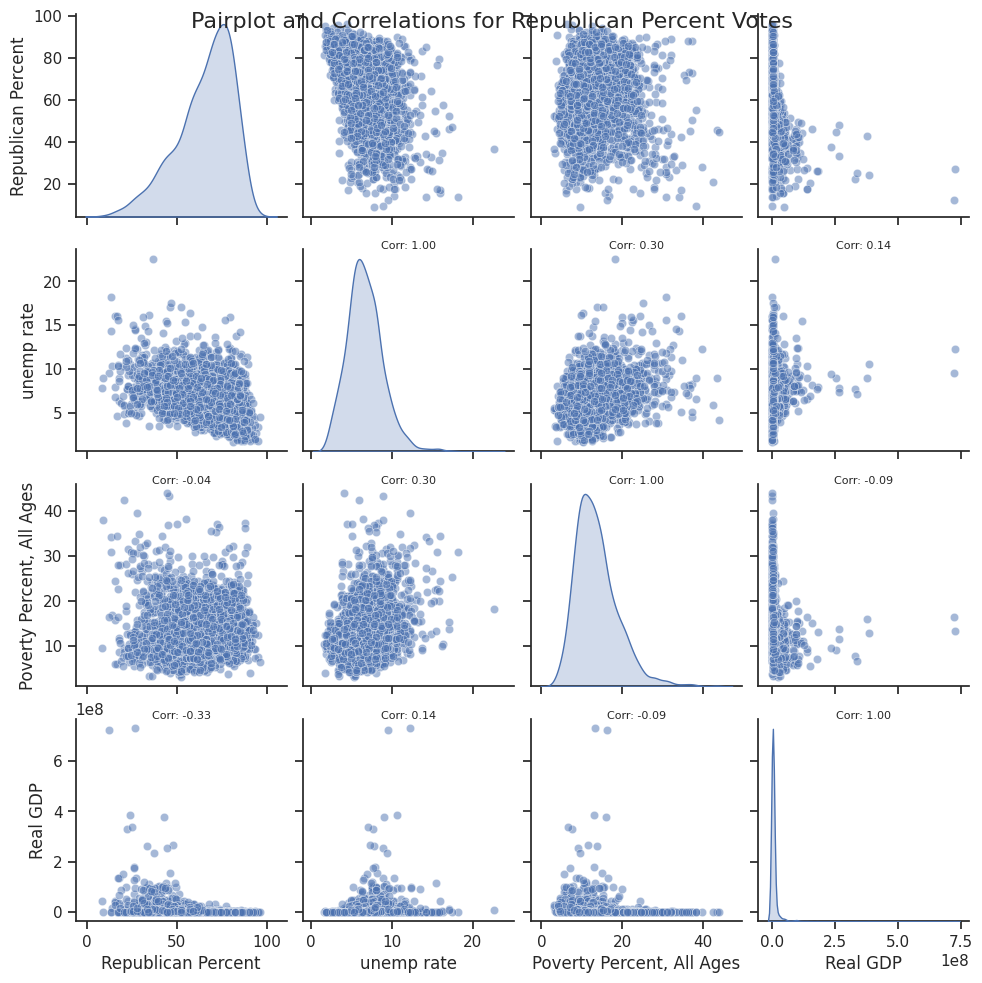

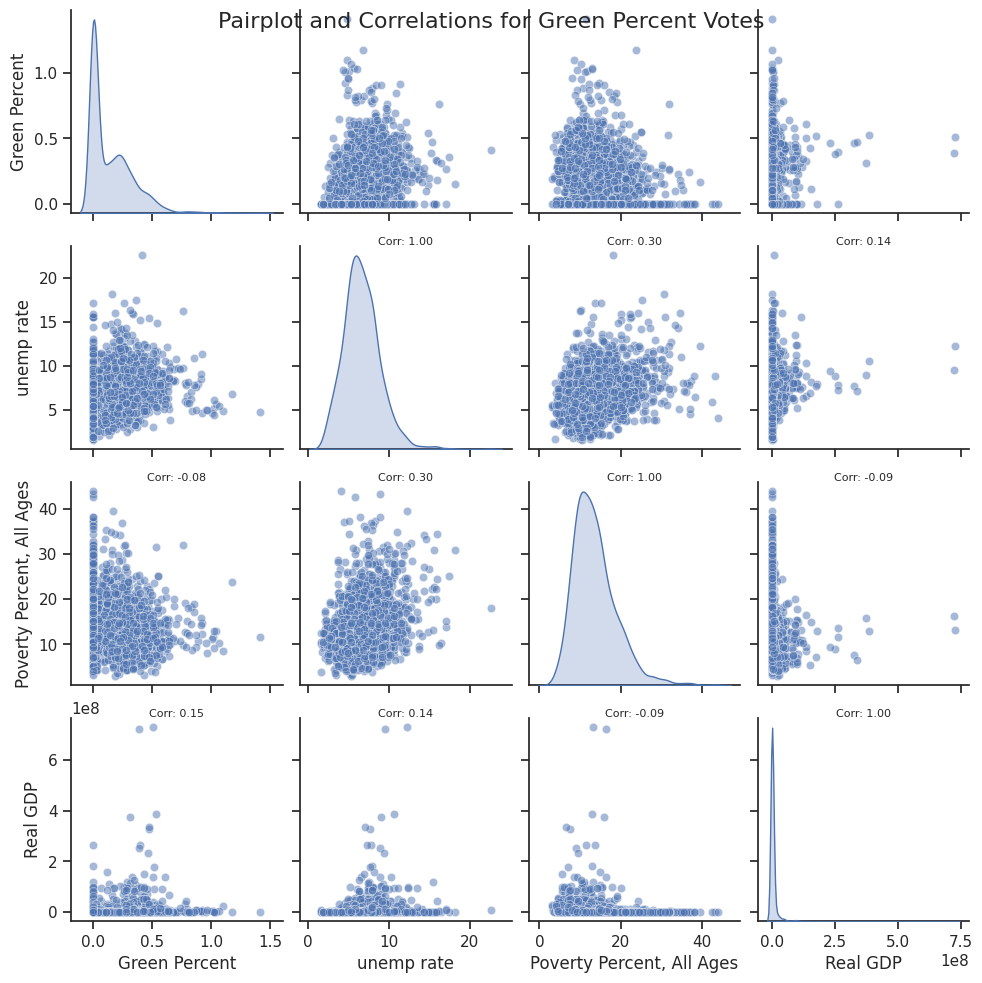

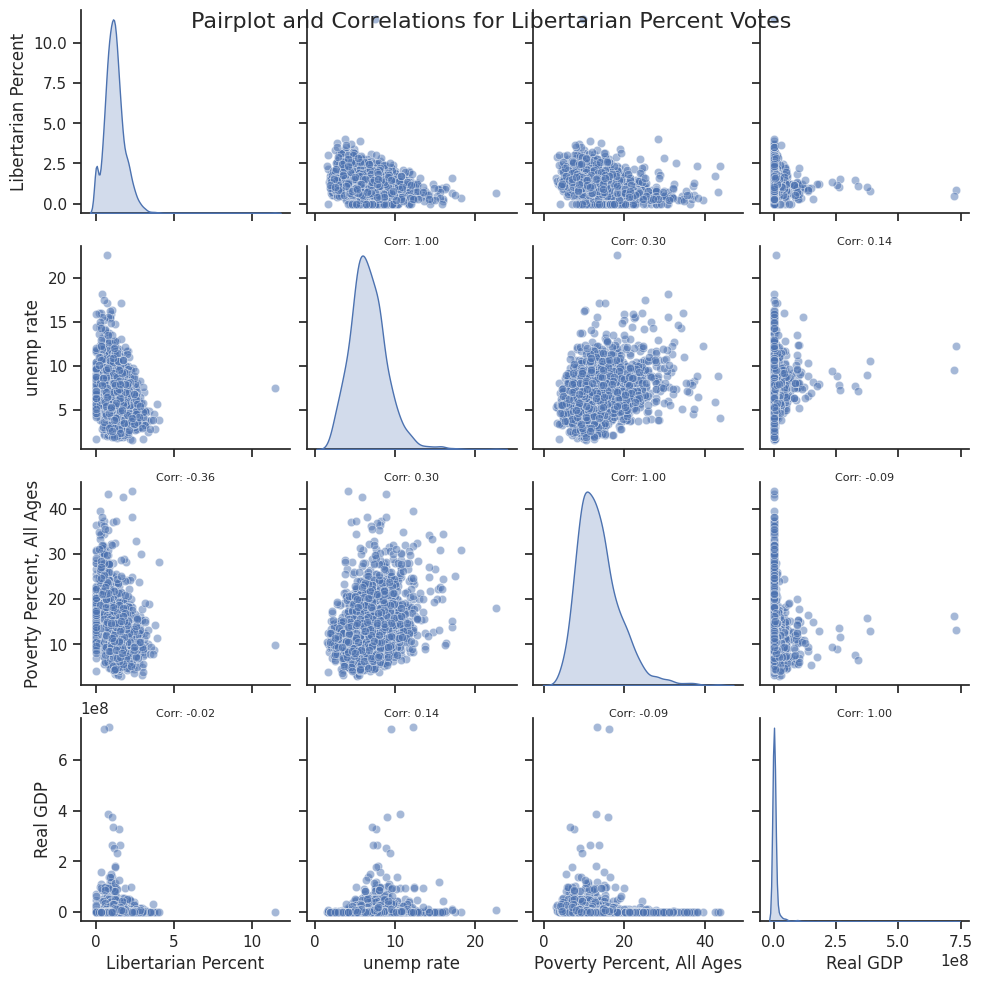

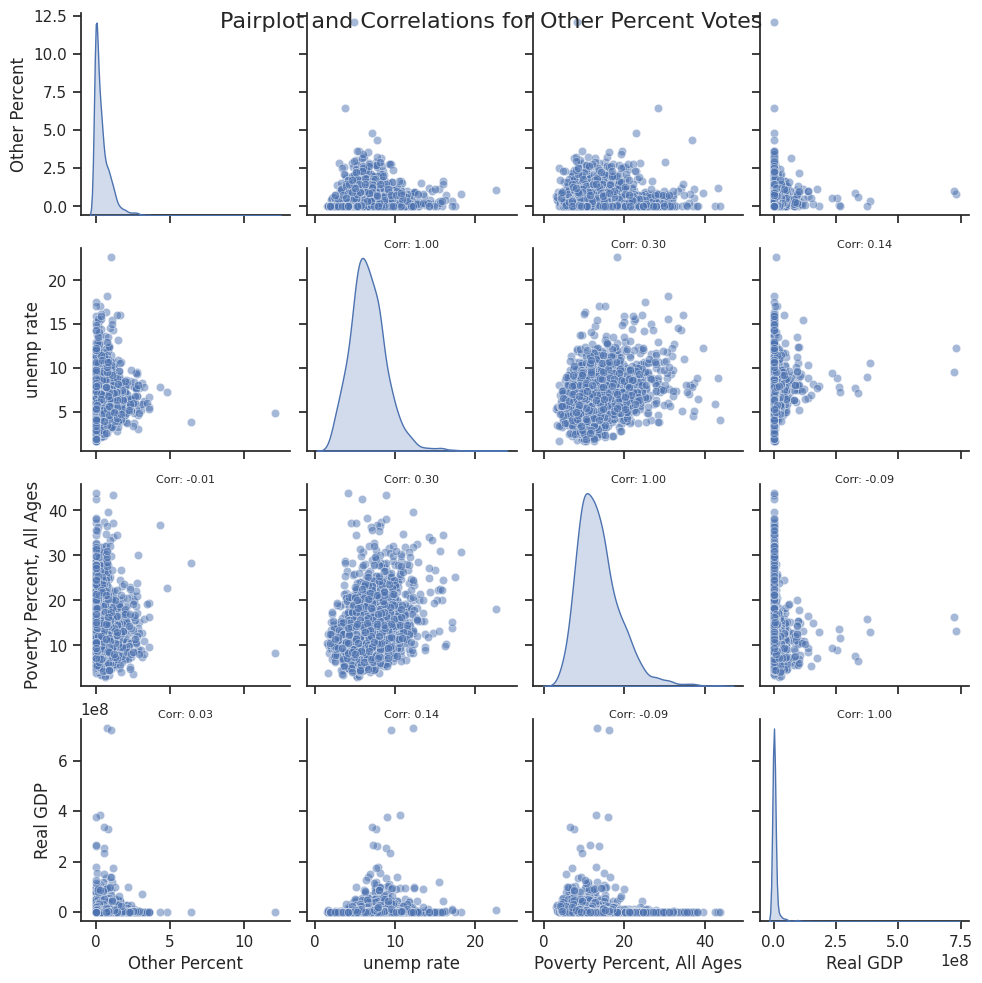

In [131]:
# Colonne di interesse per il grafico
vote_columns = ['Democrat Percent', 'Republican Percent', 'Green Percent', 'Libertarian Percent', 'Other Percent']
macroeconomic_columns = ['unemp rate', 'Poverty Percent, All Ages', 'Real GDP']

# Impostiamo lo stile di seaborn
sns.set(style="ticks")

# Funzione per creare pair plot per ogni partito e calcolare le correlazioni
def create_pairplot_for_party(vote_column, merged_data):
    # Creiamo un dataframe con le colonne di interesse
    plot_data = merged_data[[vote_column] + macroeconomic_columns]

    # Creiamo il pair plot
    pair_plot = sns.pairplot(plot_data, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.5})

    # Calcoliamo le correlazioni
    corr_values = plot_data.corr().values

    # Aggiungiamo le correlazioni numeriche nel grafico
    for i, (ax, cv) in enumerate(zip(pair_plot.axes.flat, corr_values.flatten())):
        if i > len(plot_data.columns):  # Solo la metà superiore
            col = i % len(plot_data.columns)
            row = i // len(plot_data.columns) - 1
            ax.annotate(f"Corr: {cv:.2f}",
                        xy=(0.5, 1.02), xycoords='axes fraction', ha='center',
                        va='center', fontsize=8)

    plt.suptitle(f'Pairplot and Correlations for {vote_column} Votes', size=16)
    plt.show()

# Creiamo il pair plot per ogni partito
for vote_column in vote_columns:
    create_pairplot_for_party(vote_column, merged_data)


In [137]:

# Calcoliamo le medie per ogni indicatore economico
gdp_mean = merged_data['Real GDP'].mean()
unemp_mean = merged_data['unemp rate'].mean()
poverty_mean = merged_data['Poverty Percent, All Ages'].mean()

# Definire una tolleranza del 10% attorno alla media per la categoria "Media"
tolerance = 0.10  # 10% di tolleranza

# Funzione per categorizzare i valori in base alla media con intervallo di tolleranza
def categorize(value, mean_value, tolerance):
    if value < mean_value * (1 - tolerance):  # Sotto il 10% della media
        return 'Low'
    elif value > mean_value * (1 + tolerance):  # Sopra il 10% della media
        return 'High'
    else:  # Tra -10% e +10% della media
        return 'Medium'

# Applichiamo la funzione per creare le categorie per ogni indicatore
merged_data['GDP Category'] = merged_data['Real GDP'].apply(lambda x: categorize(x, gdp_mean, tolerance))
merged_data['Unemployment Category'] = merged_data['unemp rate'].apply(lambda x: categorize(x, unemp_mean, tolerance))
merged_data['Poverty Category'] = merged_data['Poverty Percent, All Ages'].apply(lambda x: categorize(x, poverty_mean, tolerance))

# Visualizziamo le prime righe per verificare
display(merged_data.head())


,state_po,county,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,unemp rate,"Poverty Percent, All Ages",Real GDP,Democrat Percent,Republican Percent,Green Percent,Libertarian Percent,Other Percent,GDP Category,Unemployment Category,Poverty Category
0,SC,abbeville,4101,23,88,6,8215,6.50,15.30,572455,32.98,66.07,0.18,0.71,0.05,Low,Medium,High
1,VA,accomack,7578,0,188,24,9172,6.70,17.60,1785338,44.68,54.07,0.00,1.11,0.14,Low,Medium,High
2,ID,ada,120539,0,5310,2841,130699,5.50,7.70,29310868,46.47,50.39,0.00,2.05,1.10,High,Low,Low
3,OK,adair,1387,0,62,74,5585,6.00,22.30,395223,19.51,78.57,0.00,0.87,1.04,Low,Low,High
4,MO,adair,3710,43,157,13,6413,5.10,17.90,785869,35.89,62.05,0.42,1.52,0.13,Low,Low,High


<ipython-input-139-7262c3b3461f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=category_column, y=vote_column, palette=palette)


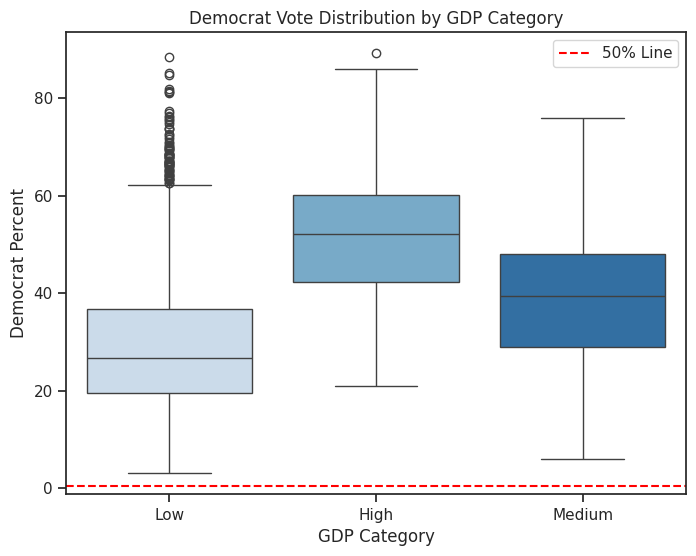

<ipython-input-139-7262c3b3461f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=category_column, y=vote_column, palette=palette)


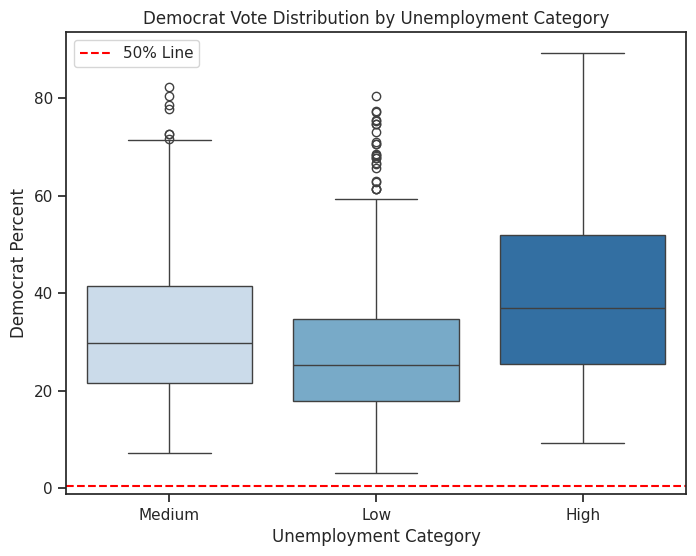

<ipython-input-139-7262c3b3461f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=category_column, y=vote_column, palette=palette)


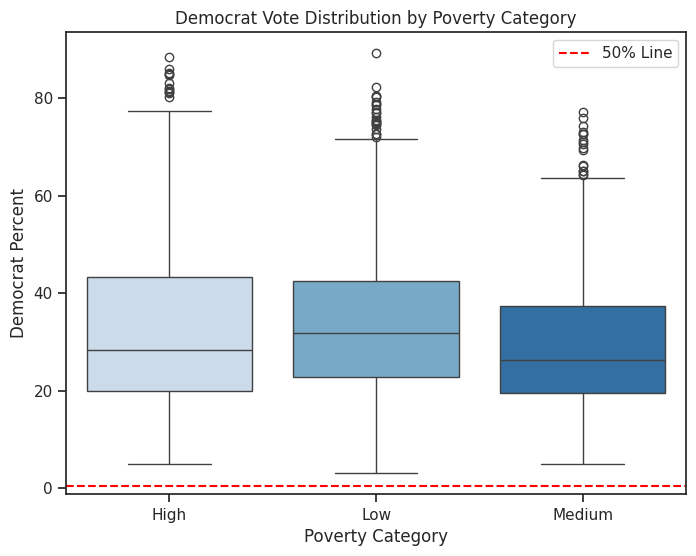

<ipython-input-139-7262c3b3461f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=category_column, y=vote_column, palette=palette)


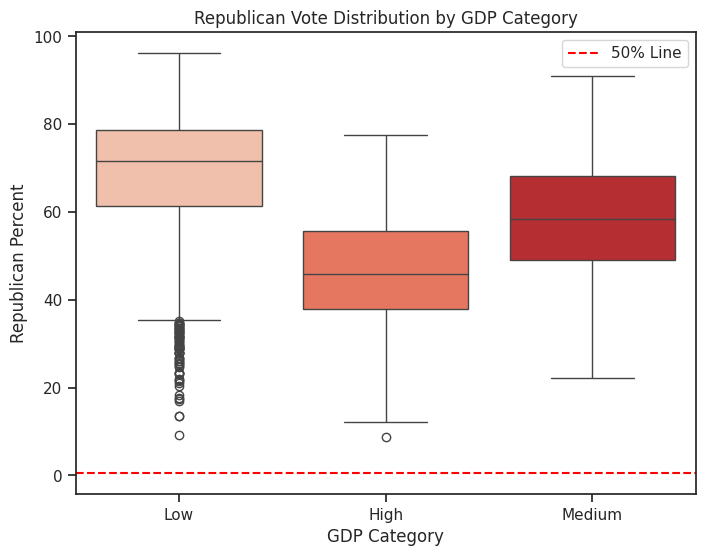

<ipython-input-139-7262c3b3461f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=category_column, y=vote_column, palette=palette)


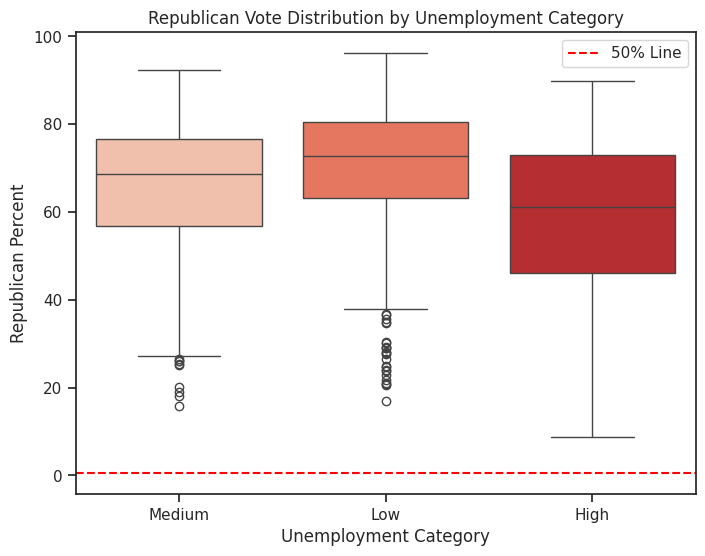

<ipython-input-139-7262c3b3461f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=category_column, y=vote_column, palette=palette)


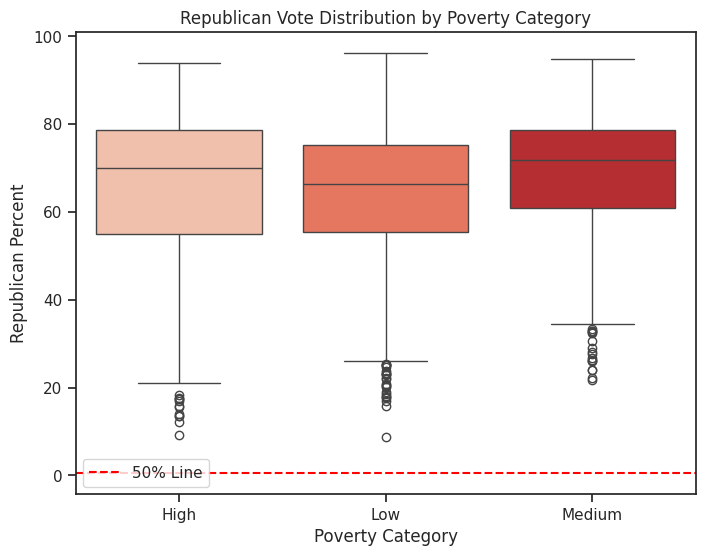

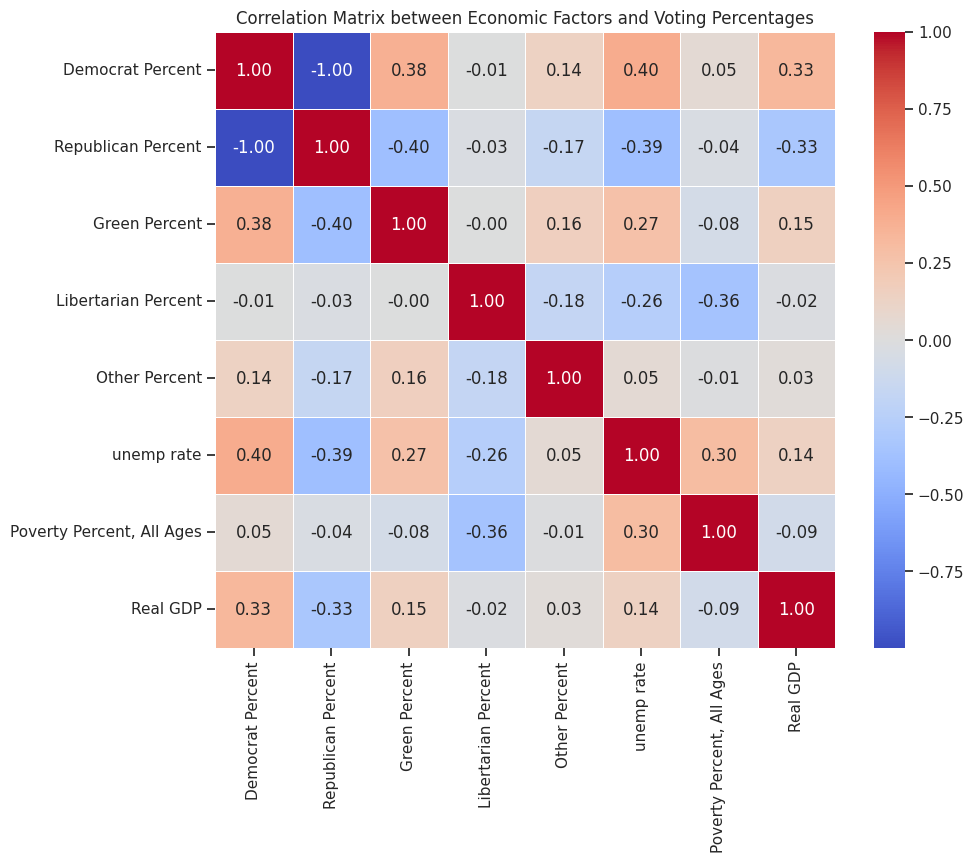

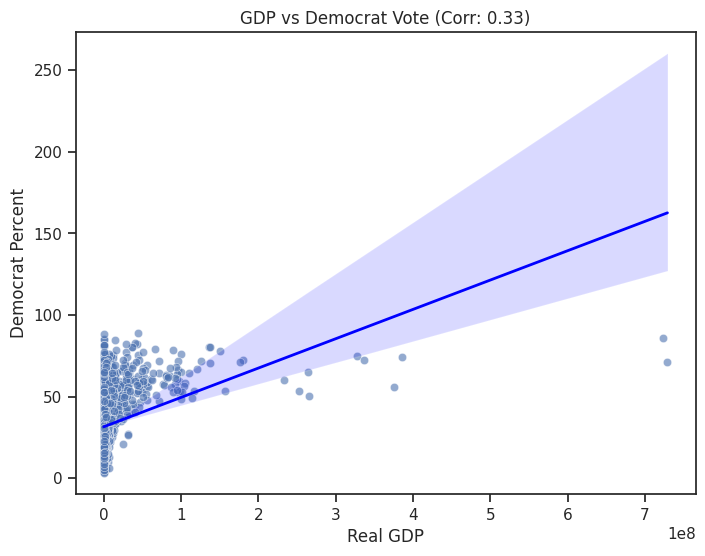

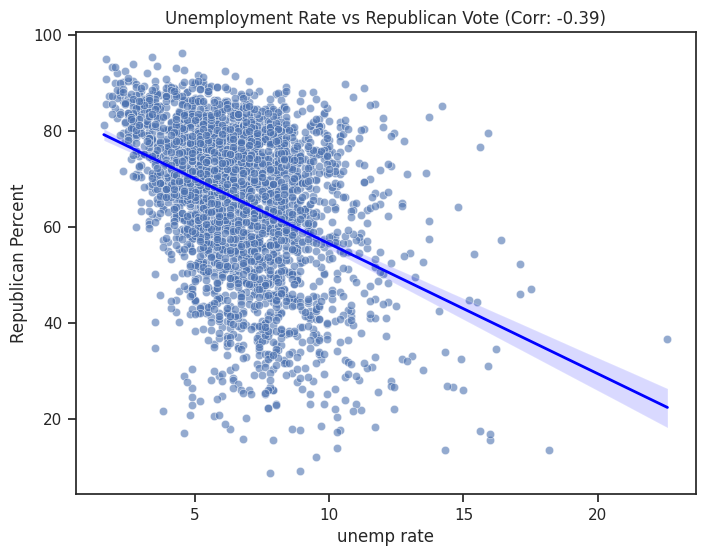

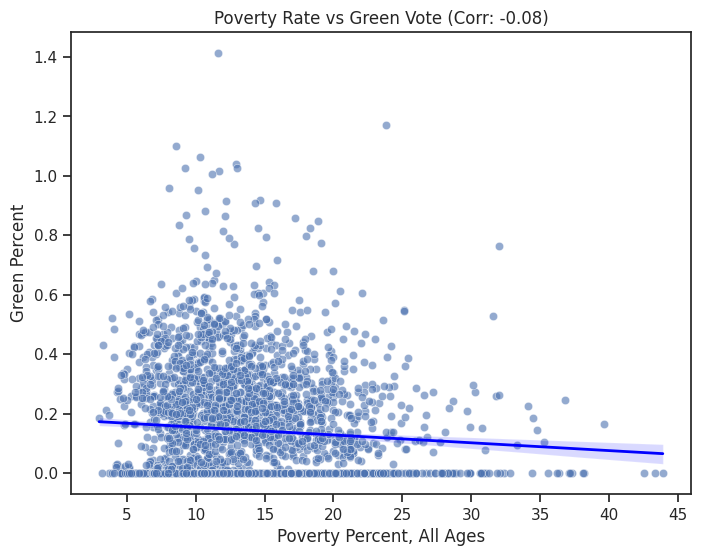